In [ ]:
# Task-3 : Cat_Dog_Image_Classifier

In [ ]:
# Uploading Dataset from Kaggle into Colab notebook

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Generators (Made to process large amount of data, for both training and validation data)

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN model
# Reduced overfitting using Batch Normaliztion and Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.1876 - accuracy: 0.6087 - val_loss: 0.6117 - val_accuracy: 0.6674
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5699 - accuracy: 0.7092 - val_loss: 0.5951 - val_accuracy: 0.6864
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4886 - accuracy: 0.7642 - val_loss: 0.4830 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4321 - accuracy: 0.8022 - val_loss: 0.4378 - val_accuracy: 0.7968
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3669 - accuracy: 0.8364 - val_loss: 0.6075 - val_accuracy: 0.7698
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2963 - accuracy: 0.8770 - val_loss: 0.4815 - val_accuracy: 0.8042
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2163 - accuracy: 0.9104 - val_loss: 0.6358 - val_ac

In [ ]:
# Graphs to study the model accuracy

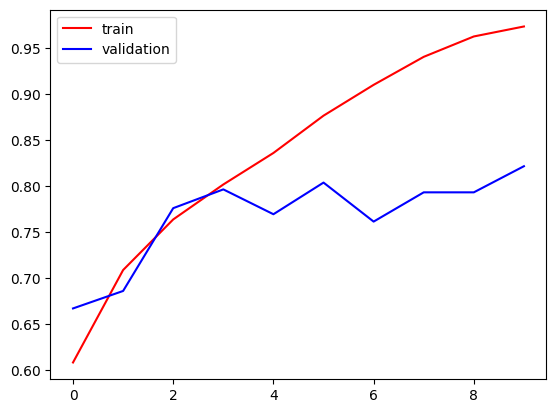

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

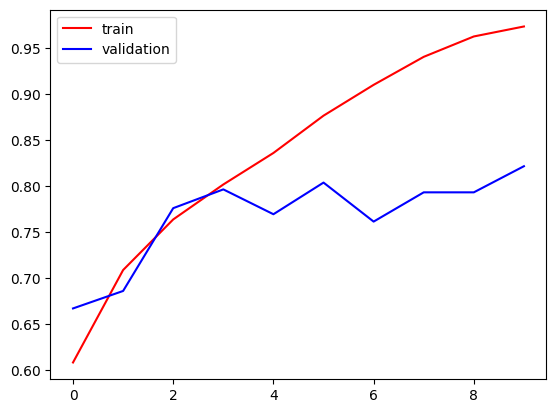

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

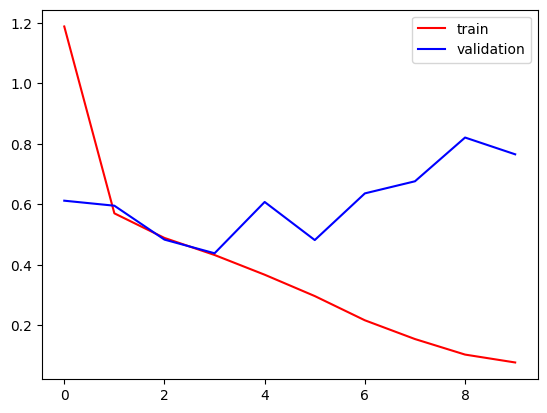

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

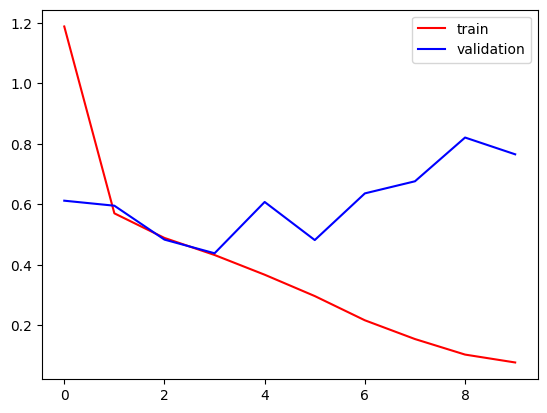

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Predicting result for test images using model
# Result - 0 indiactes Cat predicted by model
# Result - 1 indicates Dog predicted by model

In [ ]:
import cv2

In [ ]:
test_img1 = cv2.imread('/content/cat.jpg')

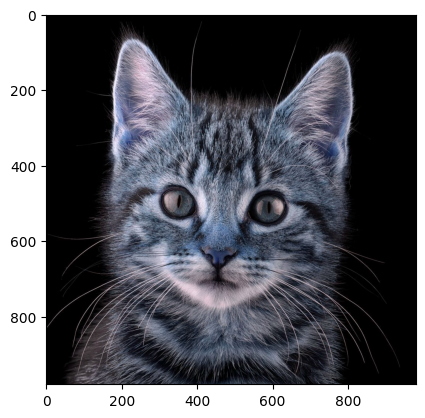

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

(980, 980, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/dog.jpg')

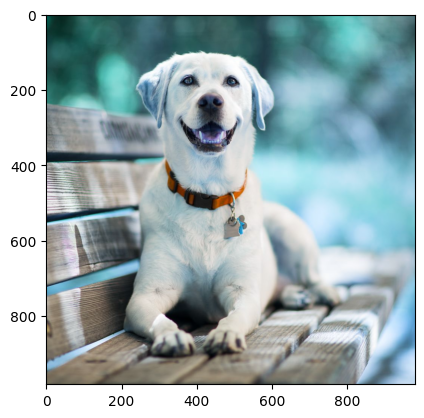

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(982, 980, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)